In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score , precision_score , recall_score, classification_report

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("/content/creditcard.csv")

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [4]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
146647,87799,-1.526981,-1.005619,-0.082273,-0.471613,1.801908,-0.739405,1.286153,-0.574174,0.751797,...,-0.514188,-0.259192,1.262969,0.228528,-0.542067,0.146979,0.109073,-0.329242,52.06,0.0
146648,87802,-0.282443,0.855224,-0.053295,-0.153733,-0.039449,-0.908046,0.377701,0.203070,0.126075,...,0.187684,0.524025,0.020133,-0.004336,-0.640167,-0.403877,-0.095465,0.030439,16.87,0.0
146649,87802,-1.210583,-0.883923,0.085170,-0.082607,2.955753,-1.913757,0.104788,-0.242375,0.108291,...,-0.170043,-0.797627,0.260314,0.526649,-0.015327,-0.670105,-0.170378,-0.110970,9.99,0.0
146650,87802,2.074648,-0.031346,-1.119717,0.378411,-0.046723,-1.123364,0.198939,-0.340896,0.510285,...,-0.296367,-0.703354,0.319490,-0.102920,-0.269098,0.204263,-0.068965,-0.061002,0.89,0.0
146651,87802,-1.937944,-2.952790,-1.719233,-1.281131,1.905859,-1.217766,1.343122,-0.894213,-0.834981,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.corr()['Class'].sort_values(ascending=False)

,Class
Class,1.000000
V11,0.164655
V4,0.143644
V2,0.103617
V21,0.076200
V27,0.058931
V8,0.050967
V19,0.042938
V20,0.014439
V28,0.011969


In [6]:
df.duplicated().sum()

556

In [7]:
df=df.drop_duplicates()

In [8]:
df['Class'].value_counts()

,count
Class,
0.0,145822
1.0,273


In [9]:
fraud = df[df['Class'] == 1]
non_fraud = df[df['Class'] == 0]

In [10]:
fraud.Amount.describe()

,Amount
count,273.000000
mean,120.586850
std,244.581885
min,0.000000
25%,1.000000
50%,12.310000
75%,105.990000
max,1809.680000


In [11]:
non_fraud.Amount.describe()

,Amount
count,145822.000000
mean,90.006356
std,245.183633
min,0.000000
25%,5.920000
50%,23.040000
75%,79.990000
max,19656.530000


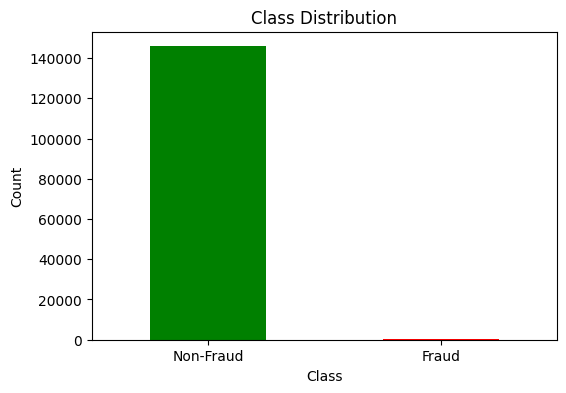

In [15]:
class_counts = df['Class'].value_counts()
class_labels = ['Non-Fraud', 'Fraud']
plt.figure(figsize=(6, 4))
class_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Class Distribution')
plt.xticks(ticks=[0, 1], labels=class_labels, rotation=0)
plt.ylabel('Count')
plt.show()

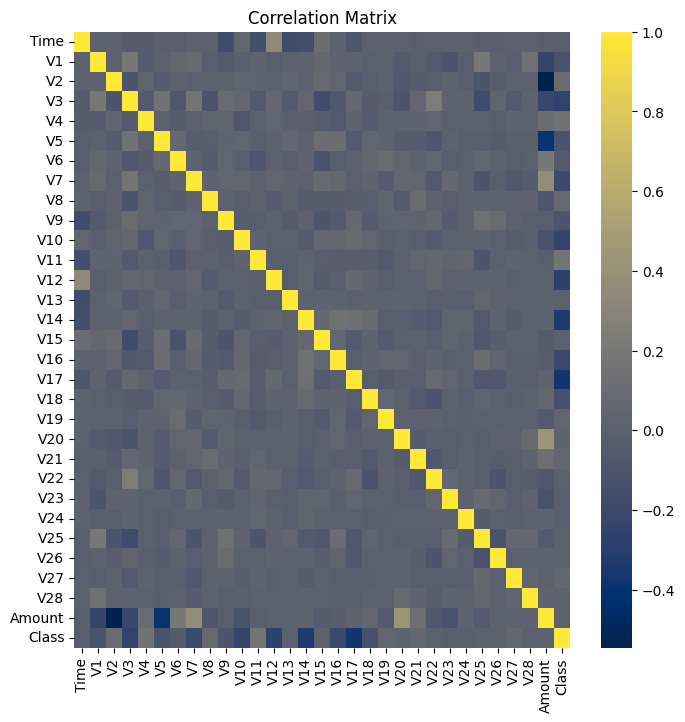

In [19]:
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(), cmap='cividis', annot=False, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

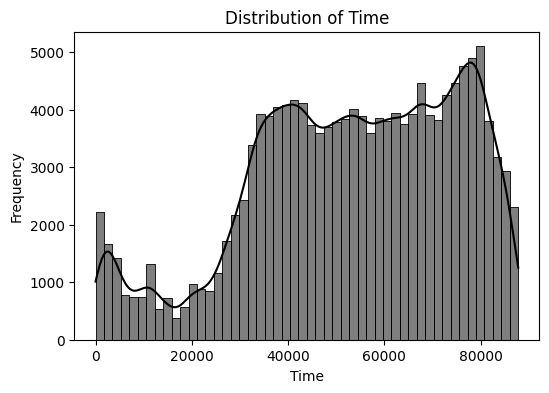

In [20]:
plt.figure(figsize=(6, 4))
sns.histplot(df['Time'], bins=50, kde=True, color='black')
plt.title('Distribution of Time')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()

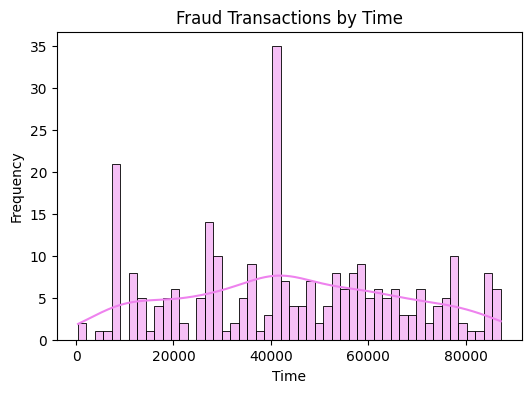

In [22]:
plt.figure(figsize=(6, 4))
sns.histplot(fraud['Time'], bins=50, kde=True, color='violet')
plt.title('Fraud Transactions by Time')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()

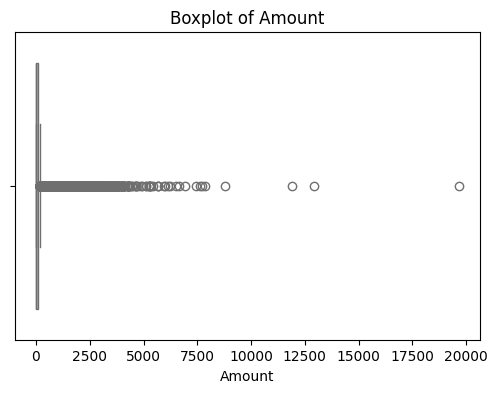

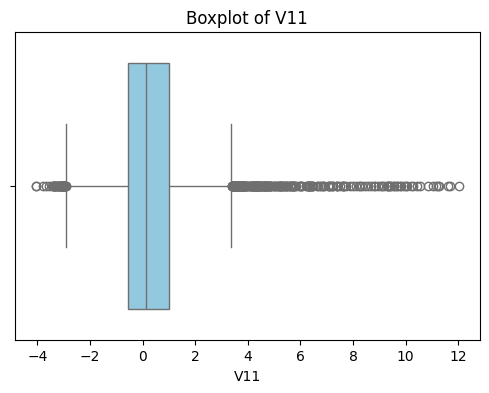

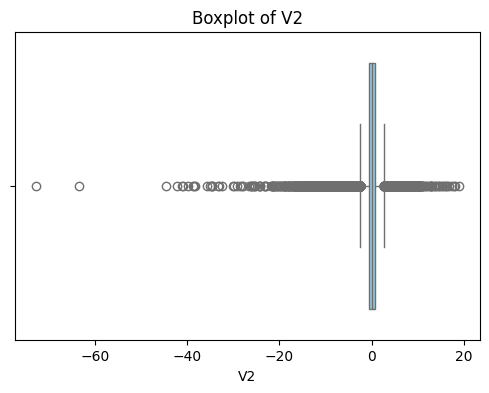

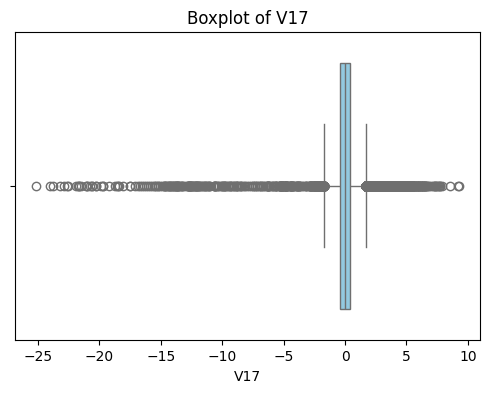

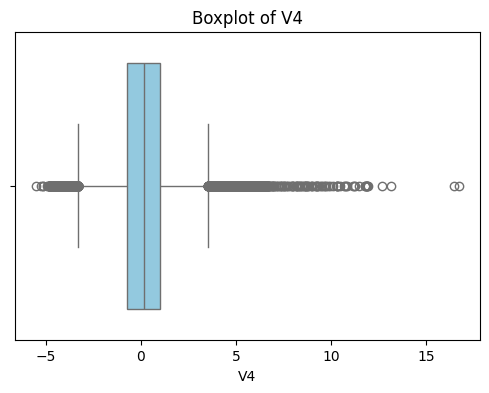

In [23]:
features = ['Amount', 'V11', 'V2', 'V17', 'V4']
for feature in features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[feature], color='skyblue')
    plt.title(f'Boxplot of {feature}')
    plt.xlabel(feature)
    plt.show()

In [24]:
X=df.drop(columns='Class')

y=df['Class']

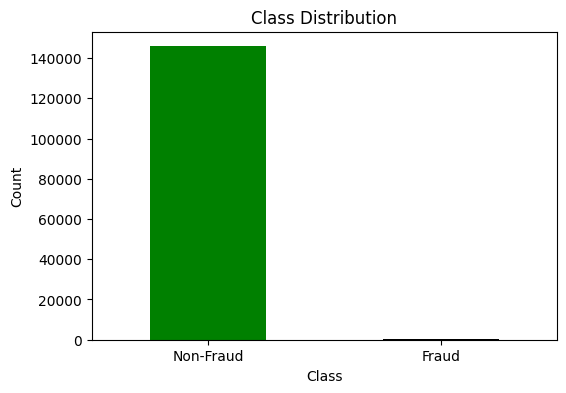

In [26]:
class_counts = y.value_counts()
class_labels = ['Non-Fraud', 'Fraud']
plt.figure(figsize=(6, 4))
class_counts.plot(kind='bar', color=['green', 'black'])
plt.title('Class Distribution')
plt.xticks(ticks=[0, 1], labels=class_labels, rotation=0)
plt.ylabel('Count')
plt.show()

In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
df = df.dropna(subset=['Class'])
X = df.drop(columns='Class')
y = df['Class']
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=.2,random_state=42, stratify=y)

In [33]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [34]:
LG = LogisticRegression()
LG.fit(X_train_resampled, y_train_resampled)

LogisticRegression()

In [35]:
y_pred_Test = LG.predict(X_test)
y_predTrain=LG.predict(X_train_resampled)

In [36]:
y_predTest=LG.predict(X_test)
y_predTrain=LG.predict(X_train_resampled)

In [37]:
print("\nAccuracy Score:")

print(f"Train Accuracy: {accuracy_score(y_train_resampled, y_predTrain)}")

print(f"Test Accuracy: {accuracy_score(y_test, y_predTest)}")


Accuracy Score:
Train Accuracy: 0.9689519792898901
Test Accuracy: 0.9776173038091652


In [38]:
print("\nRecall Score:")

print(f"Train Recall: {recall_score(y_train_resampled, y_predTrain)}")

print(f"Test Recall: {recall_score(y_test, y_predTest)}")


Recall Score:
Train Recall: 0.9595998559893021
Test Recall: 0.8727272727272727


In [39]:
print("\nClassification Report (Test):")
print(classification_report(y_test, y_predTest))


Classification Report (Test):
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99     29164
         1.0       0.07      0.87      0.13        55

    accuracy                           0.98     29219
   macro avg       0.53      0.93      0.56     29219
weighted avg       1.00      0.98      0.99     29219



In [40]:
print("Confusion Matrix (Test):")
print(confusion_matrix(y_test, y_predTest))

Confusion Matrix (Test):
[[28517   647]
 [    7    48]]


In [41]:
model = XGBClassifier(
    n_estimators=500,
    learning_rate=0.1,
    max_depth=4,
    min_child_weight=3,
    subsample=0.7,
    colsample_bytree=0.7,
    gamma=1,
    reg_alpha=2,
    reg_lambda=2
)
model.fit(X_train_resampled,y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [42]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X, y, cv=skf, scoring='accuracy')
y_predTest=model.predict(X_test)
y_predTrain=model.predict(X_train_resampled)

In [43]:
print("\nAccuracy Score:")
print(f"Train Accuracy: {accuracy_score(y_train_resampled, y_predTrain)}")
print(f"Test Accuracy: {accuracy_score(y_test, y_predTest)}")
print(f"Cross-Validation Accuracy: {cv_scores.mean():.4f}")


Accuracy Score:
Train Accuracy: 0.999939995542526
Test Accuracy: 0.9991786166535473
Cross-Validation Accuracy: 0.9996


In [44]:
print("\nPrecision Score:")

print(f"Train Precision: {precision_score(y_train_resampled, y_predTrain)}")

print(f"Test Precision: {precision_score(y_test, y_predTest)}")


Precision Score:
Train Precision: 0.9998800054854635
Test Precision: 0.7719298245614035


In [45]:
print("\nRecall Score:")

print(f"Train Recall: {recall_score(y_train_resampled, y_predTrain)}")

print(f"Test Recall: {recall_score(y_test, y_predTest)}")


Recall Score:
Train Recall: 1.0
Test Recall: 0.8


In [46]:
print("\nClassification Report (Test):")

print(classification_report(y_test, y_predTest))


Classification Report (Test):
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     29164
         1.0       0.77      0.80      0.79        55

    accuracy                           1.00     29219
   macro avg       0.89      0.90      0.89     29219
weighted avg       1.00      1.00      1.00     29219



In [47]:
print("Confusion Matrix (Test):")

print(confusion_matrix(y_test, y_predTest))

Confusion Matrix (Test):
[[29151    13]
 [   11    44]]
